In [7]:
# Load data
import csv
import numpy as np

# load file
X = []
Y = []
with open('wine.data') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    
    for row in data:
        if(len(row)==14):
            X.append([row[1], row[2], row[3], row[4], row[5], row[6], row[7],
                      row[8], row[9], row[10], row[11], row[12], row[13]])
            Y.append(row[0])
    
X = np.array(X).astype(float)
Y = np.array(Y).astype(int)
print(X.shape)
print(X[42])
print(Y[42])




(178, 13)
[1.388e+01 1.890e+00 2.590e+00 1.500e+01 1.010e+02 3.250e+00 3.560e+00
 1.700e-01 1.700e+00 5.430e+00 8.800e-01 3.560e+00 1.095e+03]
1


<IPython.core.display.Javascript object>


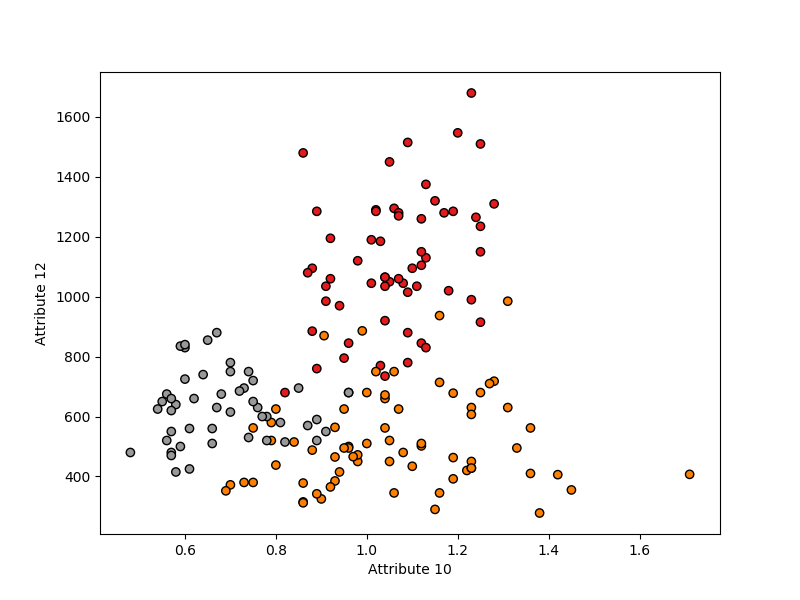

In [18]:
# Visualize data partially
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Select attribute numbers for 2D visualisation
attr_num1 = 10
attr_num2 = 12

x_min, x_max = X[:, attr_num1].min() - .5, X[:, attr_num1].max() + .5
y_min, y_max = X[:, attr_num2].min() - .5, X[:, attr_num2].max() + .5

plt.scatter(X[:,attr_num1], X[:,attr_num2], c=Y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Attribute {}'.format(attr_num1))
plt.ylabel('Attribute {}'.format(attr_num2))
plt.show()

<IPython.core.display.Javascript object>


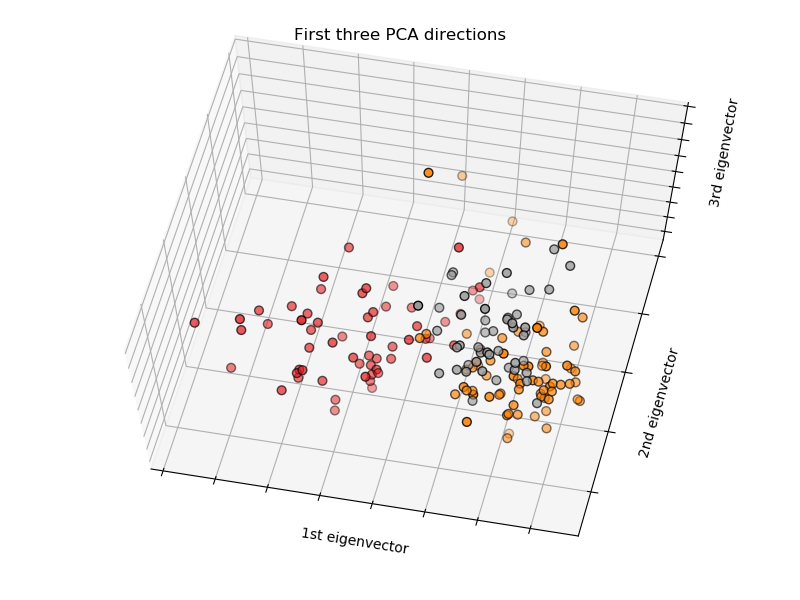

In [10]:
# PCA to visualize data completely

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()




<IPython.core.display.Javascript object>


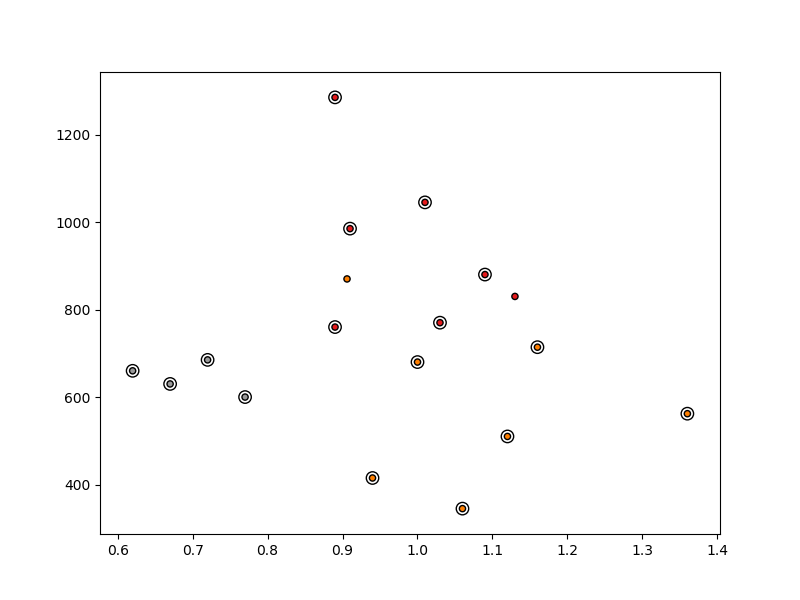

Kernel: linear
Test labels: [1. 2. 3. 3. 1. 1. 3. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 3.]
Predicted labels: [2. 2. 3. 3. 1. 1. 3. 2. 3. 2. 1. 1. 1. 2. 2. 2. 1. 3.]
Accuracy: 0.8888888888888888


<IPython.core.display.Javascript object>


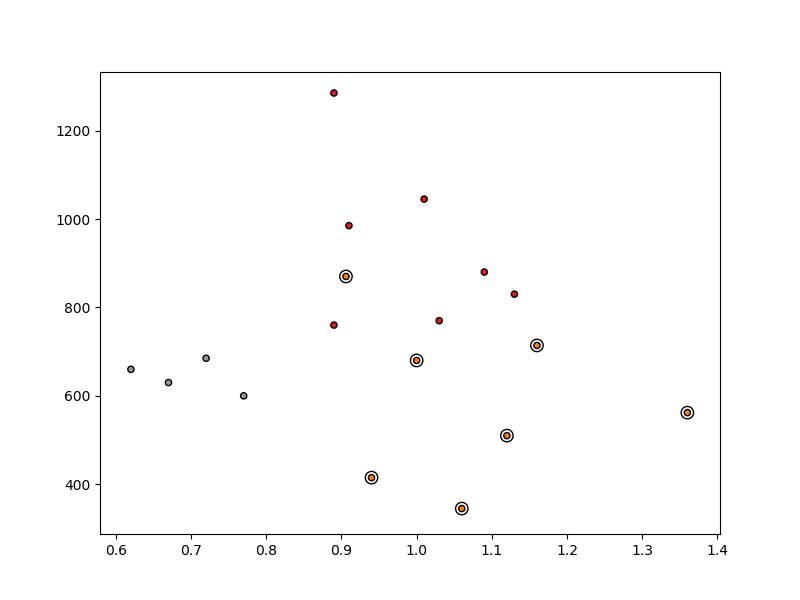

Kernel: rbf
Test labels: [1. 2. 3. 3. 1. 1. 3. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 3.]
Predicted labels: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Accuracy: 0.3888888888888889


<IPython.core.display.Javascript object>


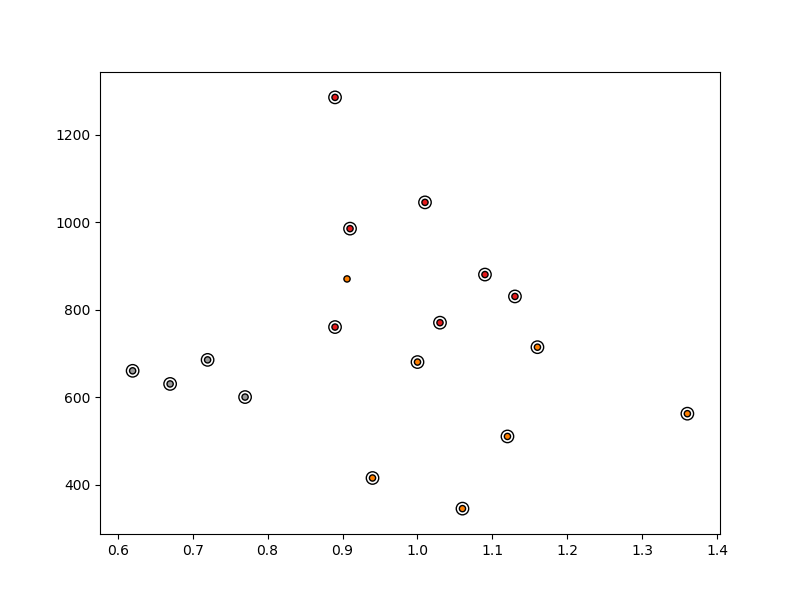

Kernel: poly
Test labels: [1. 2. 3. 3. 1. 1. 3. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 3.]
Predicted labels: [1. 2. 3. 3. 1. 1. 3. 2. 3. 2. 1. 1. 1. 2. 2. 2. 1. 3.]
Accuracy: 0.9444444444444444


In [19]:
from sklearn import svm

# Limit data to last two classes/targets and first two features/attributes
#X_lim = X[Y != 0, 2:4]
#y_lim = Y[Y != 0]
X_lim = X
y_lim = Y

# Shuffle data, since it is ordered by target
n_sample = len(X_lim)

np.random.seed(0)
order = np.random.permutation(n_sample)
X_lim = X_lim[order]
y_lim = y_lim[order].astype(np.float)

# Partition data set into training and testing data
X_train = X_lim[:int(.9 * n_sample)]
y_train = y_lim[:int(.9 * n_sample)]
X_test = X_lim[int(.9 * n_sample):]
y_test = y_lim[int(.9 * n_sample):]


# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    y_correct = np.equal(y_test, y_predict)
    
    # Plot test data
    plt.figure(figsize=(8,6))
    plt.scatter(X_test[:, attr_num1], X_test[:, attr_num2], c=y_test, zorder=10, cmap=plt.cm.Set1,
                edgecolor='k', s=20)

    # Circle out correct classified test data
    plt.scatter(X_test[:, attr_num1][y_correct], X_test[:, attr_num2][y_correct], s=80, facecolors='none',
               zorder=10, edgecolor='k')

    plt.axis('tight')

    print('Kernel: {}'.format(kernel))
    print('Test labels: {}'.format(y_test))
    print('Predicted labels: {}'.format(y_predict))
    print('Accuracy: {}'.format(np.sum(y_correct)/y_test.shape[0]))

    plt.show()